<a href="https://colab.research.google.com/github/nkefeyan-22-26/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Lab3/Lab%203%3A%20Visualizing%20Development%20with%20WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: ARM (Armenia), UMC (Upper Middle Income), WLD (World)
country_codes = ['ARM', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [19]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Armenia for specific calculations
df_arm = df.xs('ARM', axis=1, level=0).copy()

Fetching data...


In [20]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_arm['Natural_Rate_Unemp'] = df_arm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_arm['Productivity'] = df_arm['GDP_Const'] / df_arm['Labor_Force_Total']

# 3. Net Capital Outflow or Net exports (Exports - Imports)
df_arm['NCO'] = df_arm['Exports_GDP'] - df_arm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_arm['Budget_Balance'] = df_arm['Tax_Rev_GDP'] - df_arm['Gov_Exp_GDP']

In [21]:
df_arm

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
Year,,,,,,,,,,,,,,,,
2000,-0.790884,NaN,10.798668,22.161419,21.922331,50.071911,3.959425e+09,1229.215104,-12.964757,61.777,1467361.0,11.095,NaN,2698.330385,-27.910493,NaN
2001,3.145905,NaN,10.341338,24.145854,22.904355,45.718412,4.339530e+09,1351.120727,-8.753808,61.525,1484639.0,10.992,NaN,2922.952685,-21.572558,NaN
2002,1.060049,NaN,9.169042,27.832108,25.418297,46.152393,4.912347e+09,1535.204529,-2.869513,61.167,1491404.0,10.833,NaN,3293.773821,-18.320285,NaN
2003,4.721553,NaN,9.384796,30.482998,28.347950,49.568370,5.600076e+09,1759.646848,3.003448,60.837,1492557.0,10.705,NaN,3752.001495,-19.085372,NaN
2004,6.961261,13.996406,9.356232,28.190744,29.122558,44.879890,6.188084e+09,1955.222625,3.880169,60.565,1493704.0,10.617,10.8484,4142.778010,-16.689146,4.640174
2005,0.638928,14.335663,9.710012,27.313198,35.765439,42.826541,7.048228e+09,2240.092732,10.865873,60.367,1496085.0,10.540,10.7374,4711.114524,-15.513343,4.625652
2006,2.892357,14.395987,9.265641,22.145981,42.225458,38.884157,7.978594e+09,2551.435464,14.724961,60.278,1499845.0,10.465,10.6320,5319.612252,-16.738175,5.130346
2007,4.407361,15.962532,9.398192,18.189357,44.351623,38.785690,9.071661e+09,2919.373494,15.244900,60.345,1504185.0,10.394,10.5442,6030.947785,-20.596333,6.564340
2008,8.949953,17.321759,9.395906,14.265730,47.942836,40.276598,9.697606e+09,3141.331935,15.311913,60.344,1501199.0,17.100,11.8232,6459.906925,-26.010869,7.925853


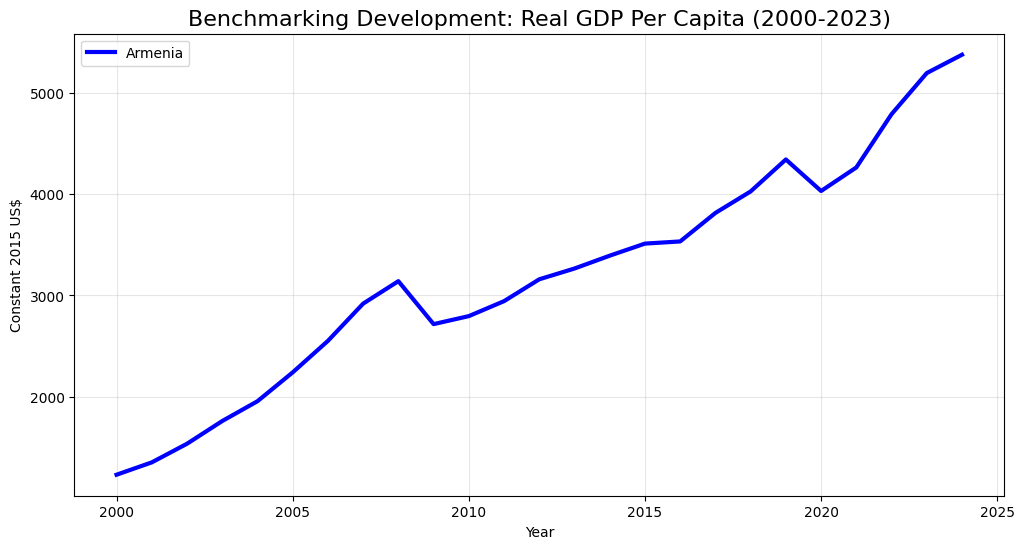

In [23]:
plt.figure(figsize=(12, 6))
# Plot ONLY Armenia
plt.plot(df.index, df[('ARM', 'GDP_Per_Capita_Const')], label='Armenia', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

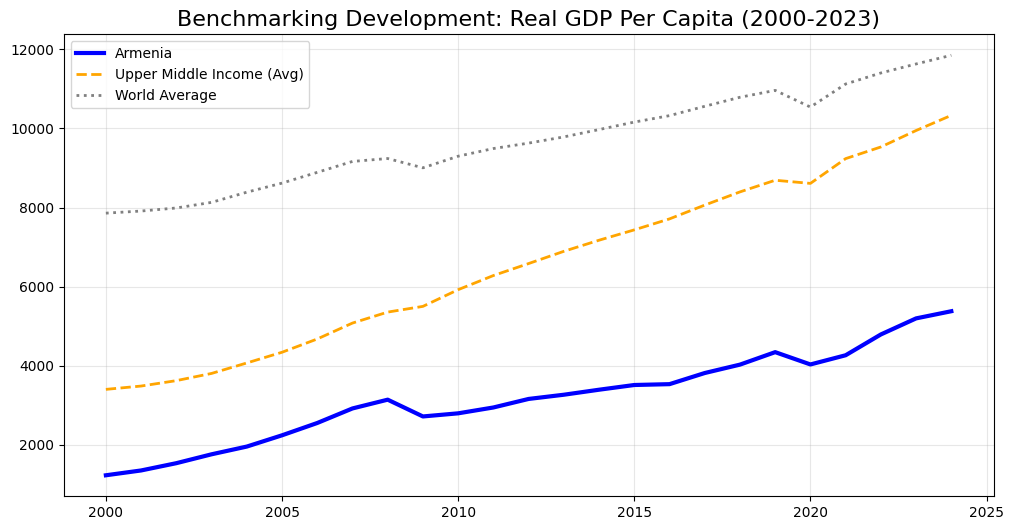

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('ARM', 'GDP_Per_Capita_Const')], label='Armenia', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

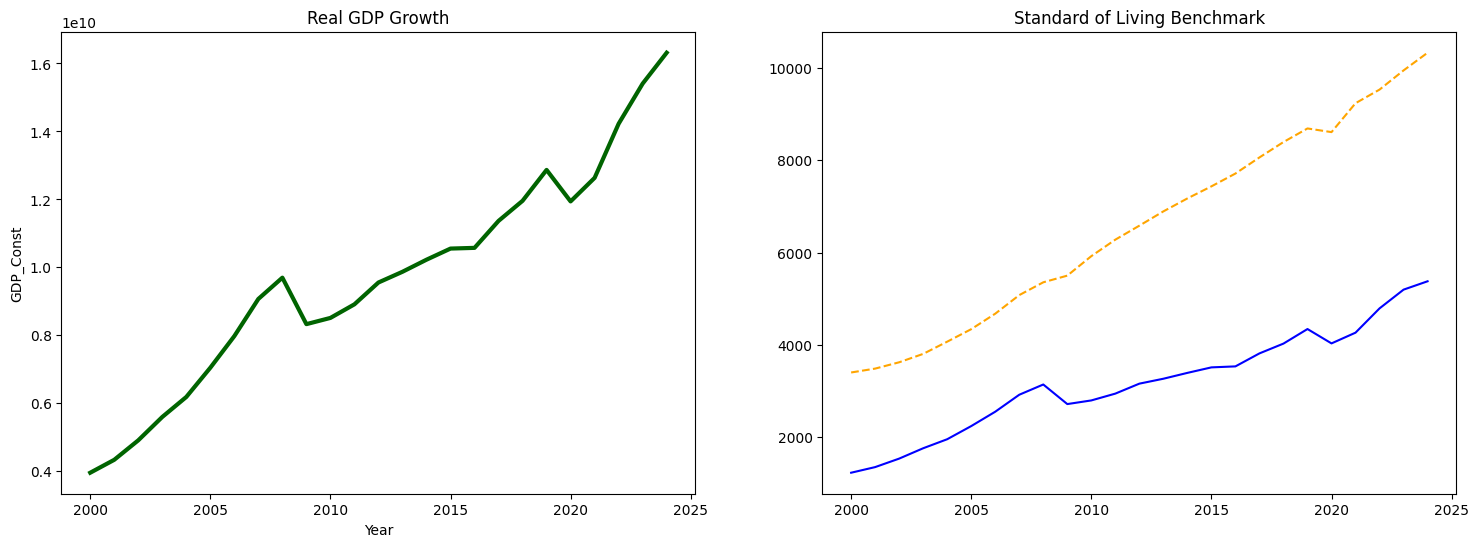

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_arm, x=df_arm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('ARM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

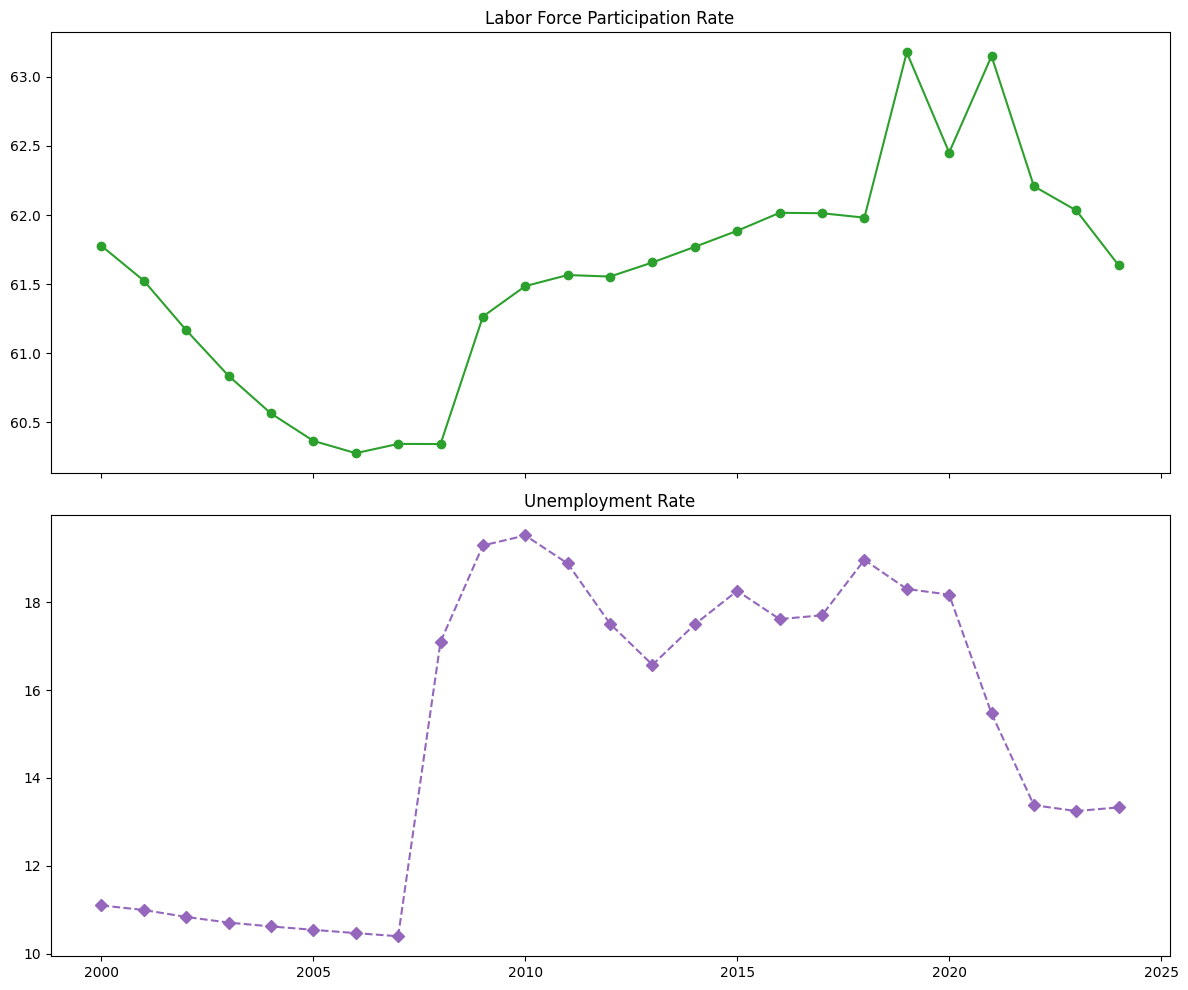

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_arm.index, df_arm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_arm.index, df_arm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

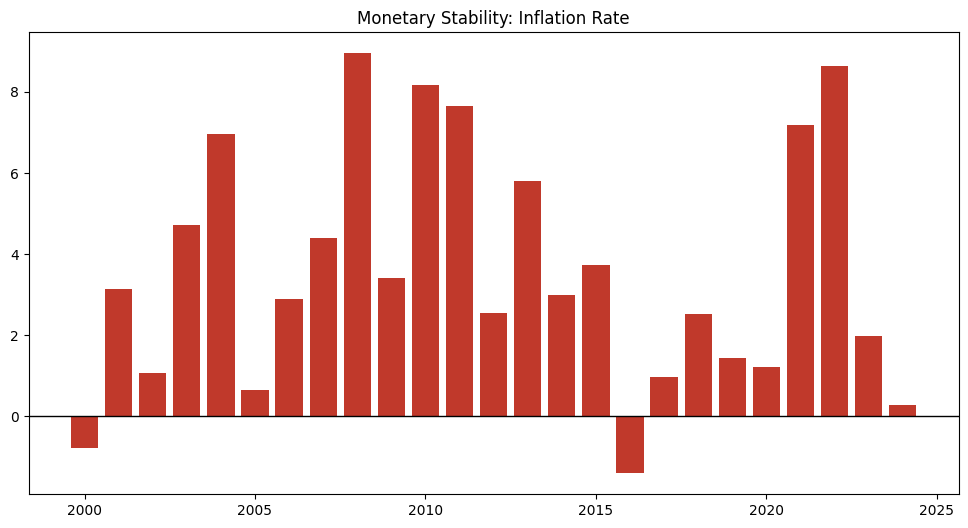

In [27]:
plt.figure(figsize=(12, 6))

plt.bar(df_arm.index, df_arm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

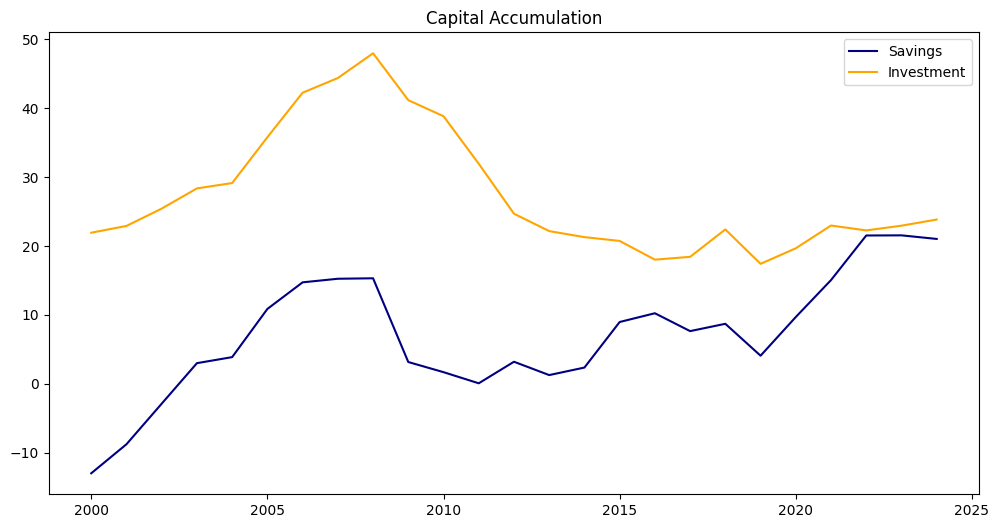

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df_arm.index, df_arm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_arm.index, df_arm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

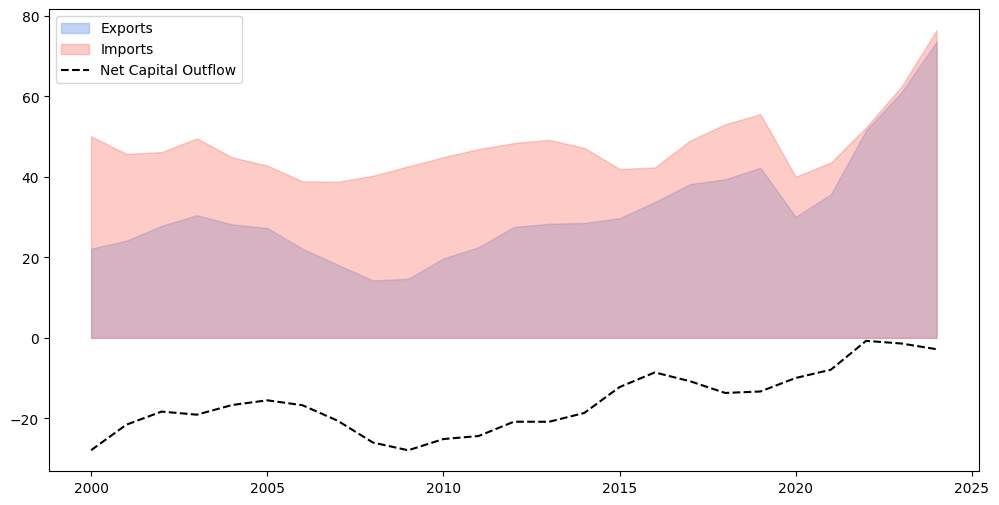

In [29]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_arm.index, df_arm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_arm.index, df_arm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_arm.index, df_arm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

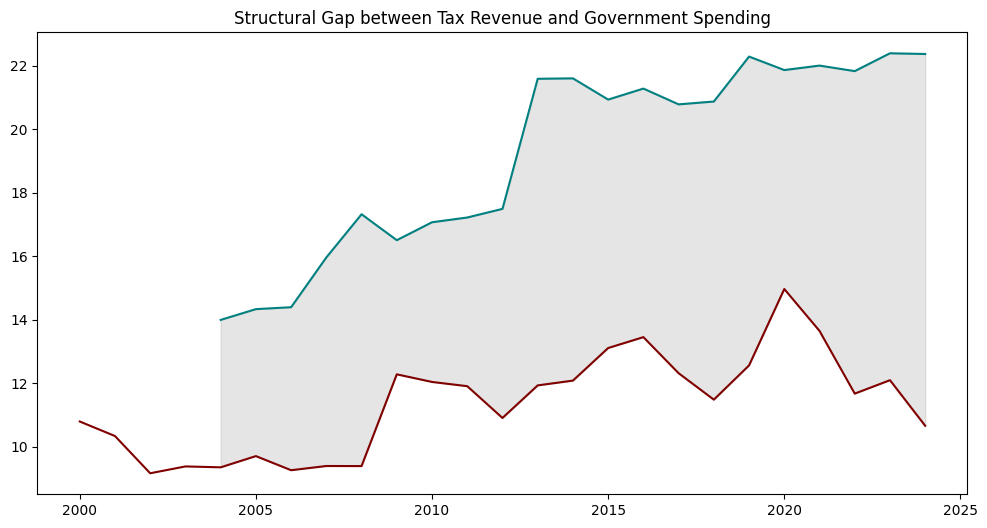

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df_arm.index, df_arm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_arm.index, df_arm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_arm.index, df_arm['Tax_Rev_GDP'], df_arm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.title("Structural Gap between Tax Revenue and Government Spending")
plt.show()

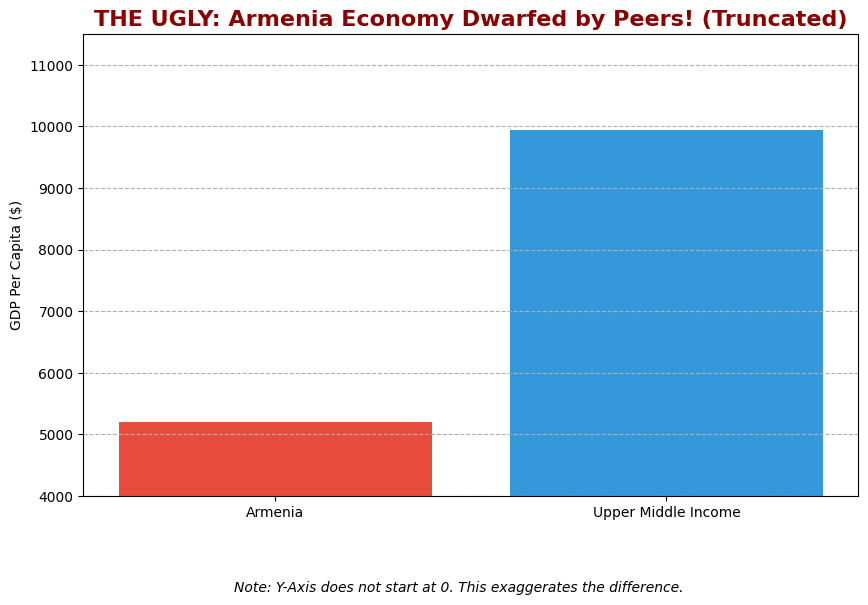

In [34]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
arm_val = df.loc[snapshot_year, ('ARM', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [arm_val, umc_val]
labels = ['Armenia', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Armenia Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

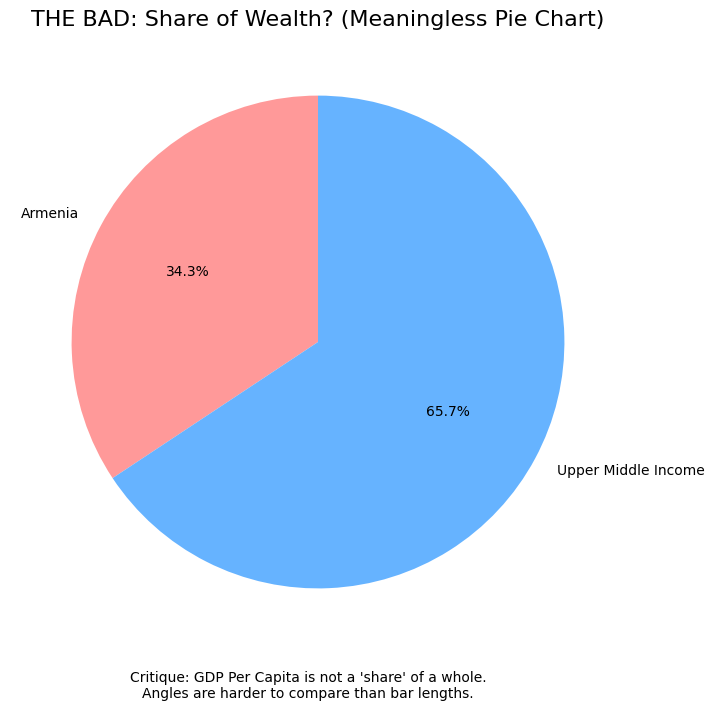

In [35]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

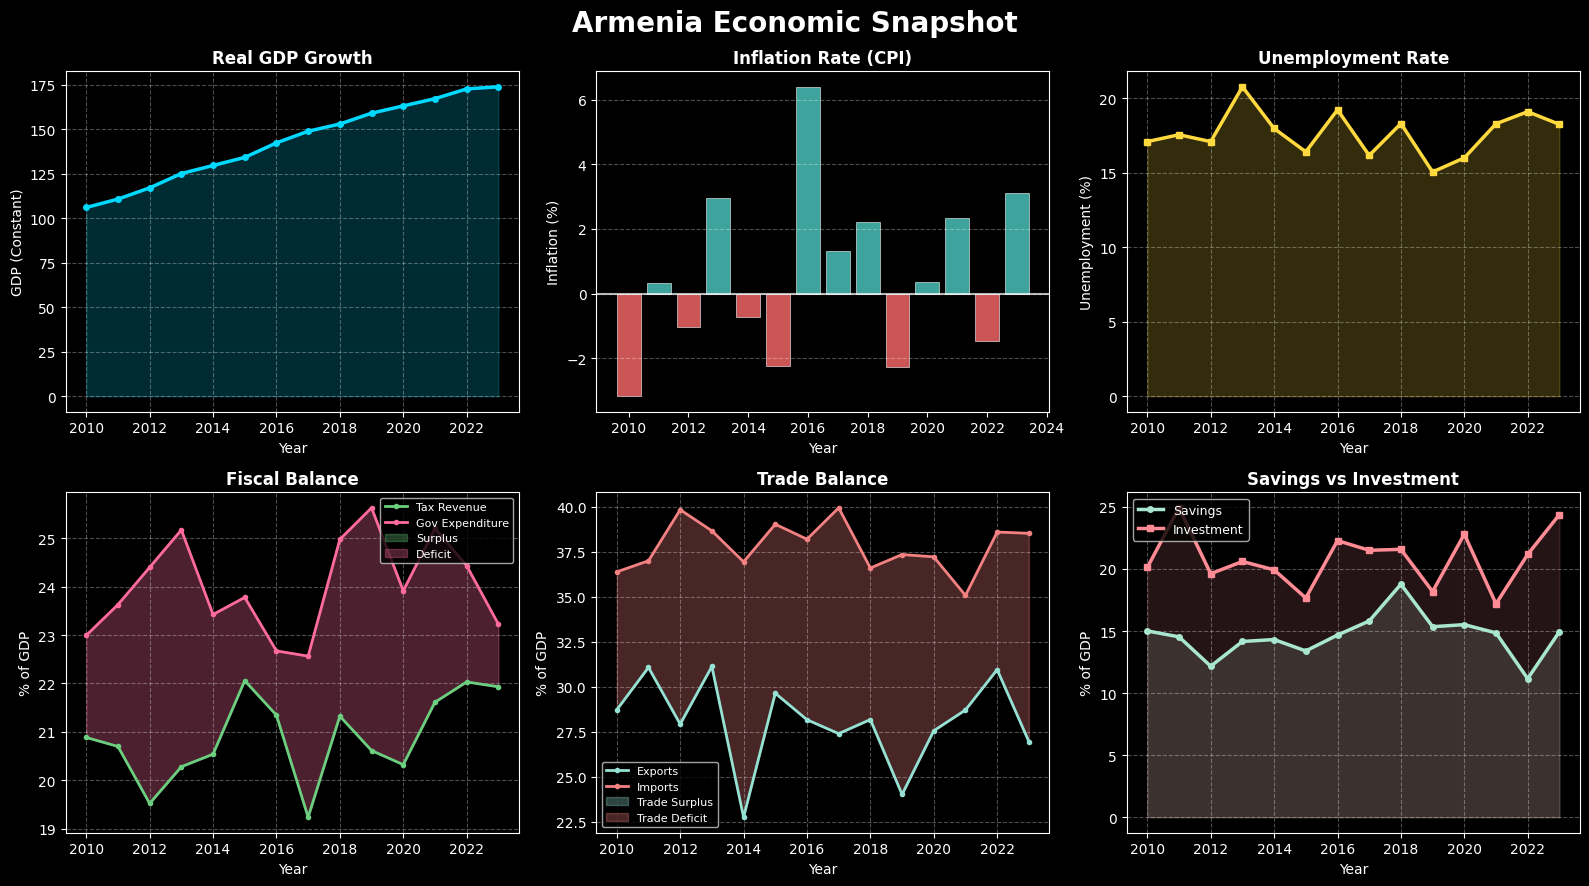

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set the dark background style
plt.style.use('dark_background')

# Create sample data (replace with your actual df_arm)
# This is just for demonstration - use your actual DataFrame
years = range(2010, 2024)
np.random.seed(42)

df_arm = pd.DataFrame({
    'Year': years,
    'GDP_Const': np.cumsum(np.random.randn(len(years)) * 2 + 5) + 100,
    'Inflation_CPI': np.random.randn(len(years)) * 3 + 2,
    'Unemployment_Rate': np.random.randn(len(years)) * 1.5 + 18,
    'Tax_Rev_GDP': np.random.randn(len(years)) * 1 + 21,
    'Gov_Exp_GDP': np.random.randn(len(years)) * 1.2 + 24,
    'Exports_GDP': np.random.randn(len(years)) * 2 + 28,
    'Imports_GDP': np.random.randn(len(years)) * 2 + 38,
    'Gross_Dom_Savings': np.random.randn(len(years)) * 2 + 15,
    'Gross_Cap_Formation': np.random.randn(len(years)) * 2 + 20
})

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Armenia Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# 1. Top Left: Real GDP (Line chart)
ax1 = axes[0, 0]
ax1.plot(df_arm['Year'], df_arm['GDP_Const'], color='#00d9ff', linewidth=2.5, marker='o', markersize=4)
ax1.set_title('Real GDP Growth', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (Constant)')
ax1.grid(alpha=0.3, linestyle='--')
ax1.fill_between(df_arm['Year'], df_arm['GDP_Const'], alpha=0.2, color='#00d9ff')

# 2. Top Middle: Inflation Rate (Bar chart with horizontal line at 0)
ax2 = axes[0, 1]
colors = ['#ff6b6b' if x < 0 else '#4ecdc4' for x in df_arm['Inflation_CPI']]
ax2.bar(df_arm['Year'], df_arm['Inflation_CPI'], color=colors, alpha=0.8, edgecolor='white', linewidth=0.5)
ax2.axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
ax2.set_title('Inflation Rate (CPI)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Inflation (%)')
ax2.grid(alpha=0.3, linestyle='--', axis='y')

# 3. Top Right: Unemployment Rate (Line chart)
ax3 = axes[0, 2]
ax3.plot(df_arm['Year'], df_arm['Unemployment_Rate'], color='#ffd93d', linewidth=2.5, marker='s', markersize=4)
ax3.set_title('Unemployment Rate', fontsize=12, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Unemployment (%)')
ax3.grid(alpha=0.3, linestyle='--')
ax3.fill_between(df_arm['Year'], df_arm['Unemployment_Rate'], alpha=0.2, color='#ffd93d')

# 4. Bottom Left: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
ax4 = axes[1, 0]
ax4.plot(df_arm['Year'], df_arm['Tax_Rev_GDP'], color='#6bcf7f', linewidth=2, label='Tax Revenue', marker='o', markersize=3)
ax4.plot(df_arm['Year'], df_arm['Gov_Exp_GDP'], color='#ff6b9d', linewidth=2, label='Gov Expenditure', marker='o', markersize=3)
ax4.fill_between(df_arm['Year'], df_arm['Tax_Rev_GDP'], df_arm['Gov_Exp_GDP'],
                  where=(df_arm['Tax_Rev_GDP'] >= df_arm['Gov_Exp_GDP']),
                  alpha=0.3, color='#6bcf7f', interpolate=True, label='Surplus')
ax4.fill_between(df_arm['Year'], df_arm['Tax_Rev_GDP'], df_arm['Gov_Exp_GDP'],
                  where=(df_arm['Tax_Rev_GDP'] < df_arm['Gov_Exp_GDP']),
                  alpha=0.3, color='#ff6b9d', interpolate=True, label='Deficit')
ax4.set_title('Fiscal Balance', fontsize=12, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('% of GDP')
ax4.legend(loc='best', fontsize=8)
ax4.grid(alpha=0.3, linestyle='--')

# 5. Bottom Middle: Trade Balance (Fill area between Exports and Imports)
ax5 = axes[1, 1]
ax5.plot(df_arm['Year'], df_arm['Exports_GDP'], color='#95e1d3', linewidth=2, label='Exports', marker='o', markersize=3)
ax5.plot(df_arm['Year'], df_arm['Imports_GDP'], color='#f38181', linewidth=2, label='Imports', marker='o', markersize=3)
ax5.fill_between(df_arm['Year'], df_arm['Exports_GDP'], df_arm['Imports_GDP'],
                  where=(df_arm['Exports_GDP'] >= df_arm['Imports_GDP']),
                  alpha=0.3, color='#95e1d3', interpolate=True, label='Trade Surplus')
ax5.fill_between(df_arm['Year'], df_arm['Exports_GDP'], df_arm['Imports_GDP'],
                  where=(df_arm['Exports_GDP'] < df_arm['Imports_GDP']),
                  alpha=0.3, color='#f38181', interpolate=True, label='Trade Deficit')
ax5.set_title('Trade Balance', fontsize=12, fontweight='bold')
ax5.set_xlabel('Year')
ax5.set_ylabel('% of GDP')
ax5.legend(loc='best', fontsize=8)
ax5.grid(alpha=0.3, linestyle='--')

# 6. Bottom Right: Savings vs Investment (Dual lines)
ax6 = axes[1, 2]
ax6.plot(df_arm['Year'], df_arm['Gross_Dom_Savings'], color='#a8e6cf', linewidth=2.5, marker='o', markersize=4, label='Savings')
ax6.plot(df_arm['Year'], df_arm['Gross_Cap_Formation'], color='#ff8b94', linewidth=2.5, marker='s', markersize=4, label='Investment')
ax6.set_title('Savings vs Investment', fontsize=12, fontweight='bold')
ax6.set_xlabel('Year')
ax6.set_ylabel('% of GDP')
ax6.legend(loc='best', fontsize=9)
ax6.grid(alpha=0.3, linestyle='--')
ax6.fill_between(df_arm['Year'], df_arm['Gross_Dom_Savings'], alpha=0.15, color='#a8e6cf')
ax6.fill_between(df_arm['Year'], df_arm['Gross_Cap_Formation'], alpha=0.15, color='#ff8b94')

# Apply tight layout to prevent overlap
plt.tight_layout()

# Display the dashboard
plt.show()